# Project 1.2: Timeline of Baby Names

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [14]:
path = '../FS22_Data_Science_TE/names'

## Task 1
#### Calculating the percentage of total births in 2000 for each name and storing it in a new column.

In [15]:
df = pd.read_csv("./names/yob2000.txt", header=0, names = ["name", "gender", "count"])
df.head()

,name,gender,count
0,Hannah,F,23085
1,Madison,F,19968
2,Ashley,F,17997
3,Sarah,F,17708
4,Alexis,F,17631


In [16]:
total_names = df["count"].sum()
total_names

3753423

In [17]:
df["percentage of total"] = df["count"] / total_names * 100
df.head()

,name,gender,count,percentage of total
0,Hannah,F,23085,0.615039
1,Madison,F,19968,0.531994
2,Ashley,F,17997,0.479482
3,Sarah,F,17708,0.471783
4,Alexis,F,17631,0.469731


## Task 2
#### Reading all files and concatenating them into a single data structure.

In [18]:
# Reading the files for each year

data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df.shape

(2052781, 4)

In [19]:
# Inspecting the head of the new, concatenated data frame.

df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Task 3
#### Calculating the number of births for each year and visualising them as a line plot.

<AxesSubplot:xlabel='year', ylabel='count'>

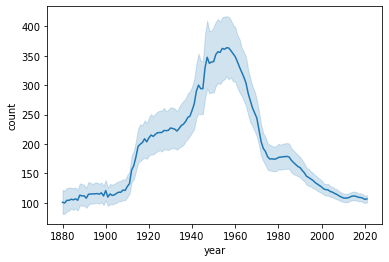

In [21]:
# Seaborn version

sns.lineplot(data=df, x="year", y="count")

## Task 4
#### Plot for my own name

In [22]:
# Replacing missing data

df["count"].fillna(0, inplace=True)

In [24]:
df_till = df[df["name"] == "Till"]
df_till[["count", "year"]]

,count,year
129019,5,1915
138701,5,1916
148605,5,1917
1721476,8,2011
1824566,6,2014
1957502,5,2018
1987666,6,2019


Text(0, 0.5, 'Count')

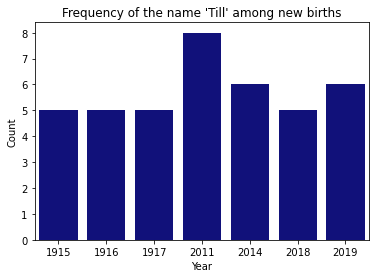

In [29]:
till_plot = sns.barplot(data=df_till, x = "year", y="count", color="darkblue")
till_plot.set_title("Frequency of the name 'Till' among new births")
till_plot.set_xlabel("Year")
till_plot.set_ylabel("Count")

## Task 5
#### Plotting some famous names.

In [32]:
# Creating a list of famous names to search our data frame with

names = ['Madonna','Luke','Leia', 'Arielle']
famous_names = df[df.name.isin(names)]
famous_names

,name,gender,count,year
1197,Luke,M,43,1880
3178,Luke,M,42,1881
5220,Luke,M,44,1882
7384,Luke,M,38,1883
9591,Luke,M,39,1884
...,...,...,...,...
2021542,Leia,F,1067,2021
2021602,Arielle,F,852,2021
2034138,Luke,F,7,2021
2035727,Madonna,F,6,2021


Text(0, 0.5, 'Count')

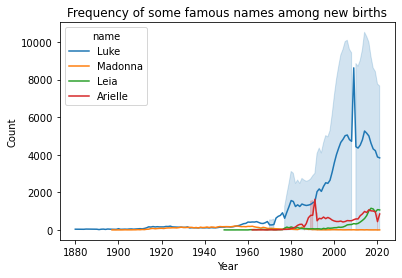

In [33]:
# Plotting the frequency of those famous names in seaborn

famous_people_plot = sns.lineplot(data=famous_names, x = "year", y="count", hue="name")
famous_people_plot.set_title("Frequency of some famous names among new births")
famous_people_plot.set_xlabel("Year")
famous_people_plot.set_ylabel("Count")

## Task 6
#### Normalizing data from Task 4.

In [34]:
df_till["% of total"] = df_till["count"] / total_names
df_till[["count", "year", "% of total"]].head(10)

/Users/tillermold/opt/anaconda3/envs/xeno-canto-metadata/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,year,% of total
129019,5,1915,0.000001
138701,5,1916,0.000001
148605,5,1917,0.000001
1721476,8,2011,0.000002
1824566,6,2014,0.000002
1957502,5,2018,0.000001
1987666,6,2019,0.000002
